Data Preprocessing
================

In [2]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('search_list_may_to_september.csv')
df.head()

,date,day,month,search topic
0,2024-05-01,Wednesday,May,Machine Learning
1,2024-05-02,Thursday,May,Data Analysis
2,2024-05-03,Friday,May,React.js
3,2024-05-04,Saturday,May,JavaScript Basics
4,2024-05-05,Sunday,May,CSS Flexbox


In [5]:
df.isnull().sum()

date            0
day             0
month           0
search topic    0
dtype: int64

In [6]:
df.columns

Index(['date', 'day', 'month', 'search topic'], dtype='object')

In [7]:
# Frequency count of search topics
search_topic_counts = df['search topic'].value_counts()

# Define a threshold to identify rare search topics
threshold = 5  # For example, topics with less than 5 occurrences

# Identify rare search topics
rare_search_topics = search_topic_counts[search_topic_counts < threshold]

print("Rare Search Topics:")
print(rare_search_topics)


Rare Search Topics:
Series([], Name: count, dtype: int64)


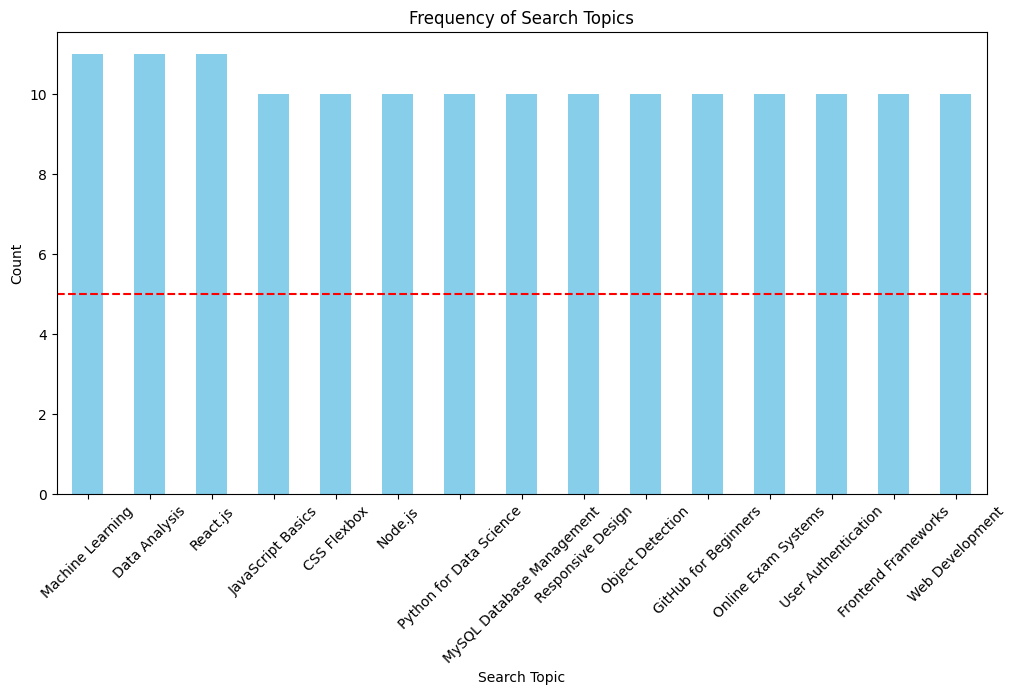

In [8]:
import matplotlib.pyplot as plt

# Plot the frequency of search topics
search_topic_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Frequency of Search Topics')
plt.xlabel('Search Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.axhline(y=threshold, color='red', linestyle='--')  # Threshold line
plt.show()


Axes(0.125,0.11;0.775x0.77)


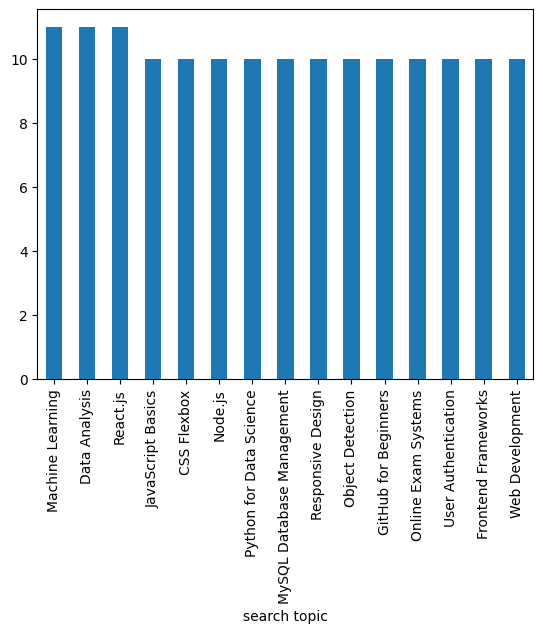

In [9]:
print(df['search topic'].value_counts().plot(kind='bar'))
import matplotlib.pyplot as plt
import seaborn as sns

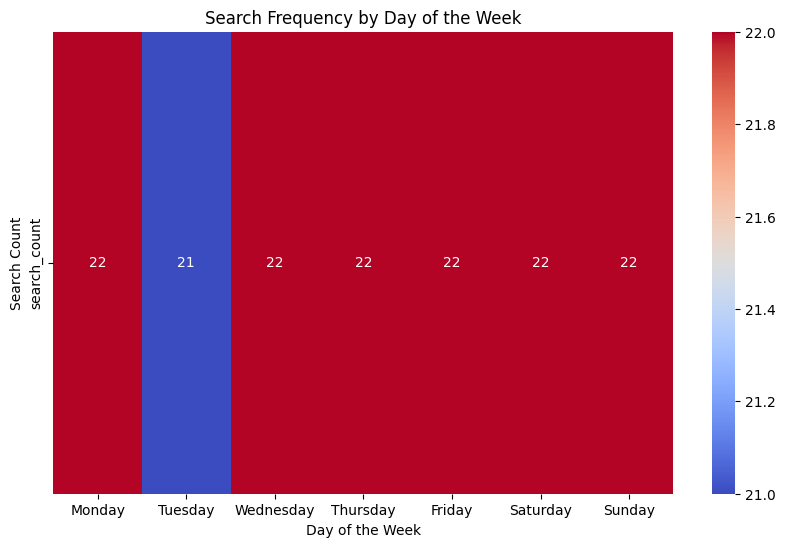

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('search_list_may_to_september.csv')

# Convert the 'date' column to datetime if not already done
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (0=Monday, 6=Sunday) and the day name
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()

# Count occurrences of searches per day
day_counts = df['day_name'].value_counts().sort_index()

# Create a pivot table for better heatmap visualization (adjustable as needed)
pivot_table = df.groupby(['day_name']).size().reset_index(name='search_count')

# Reorder days to show from Monday to Sunday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.set_index('day_name').reindex(ordered_days).reset_index()

# Plotting the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table[['search_count']].T, annot=True, fmt="d", cmap='coolwarm', cbar=True, xticklabels=pivot_table['day_name'])
plt.title('Search Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Search Count')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_28808\933066588.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_name', y='search_count', data=day_search_counts, ci=None, estimator=sum, order=ordered_days, palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_28808\933066588.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='search_count', data=day_search_counts, ci=None, estimator=sum, order=ordered_days, palette='coolwarm')


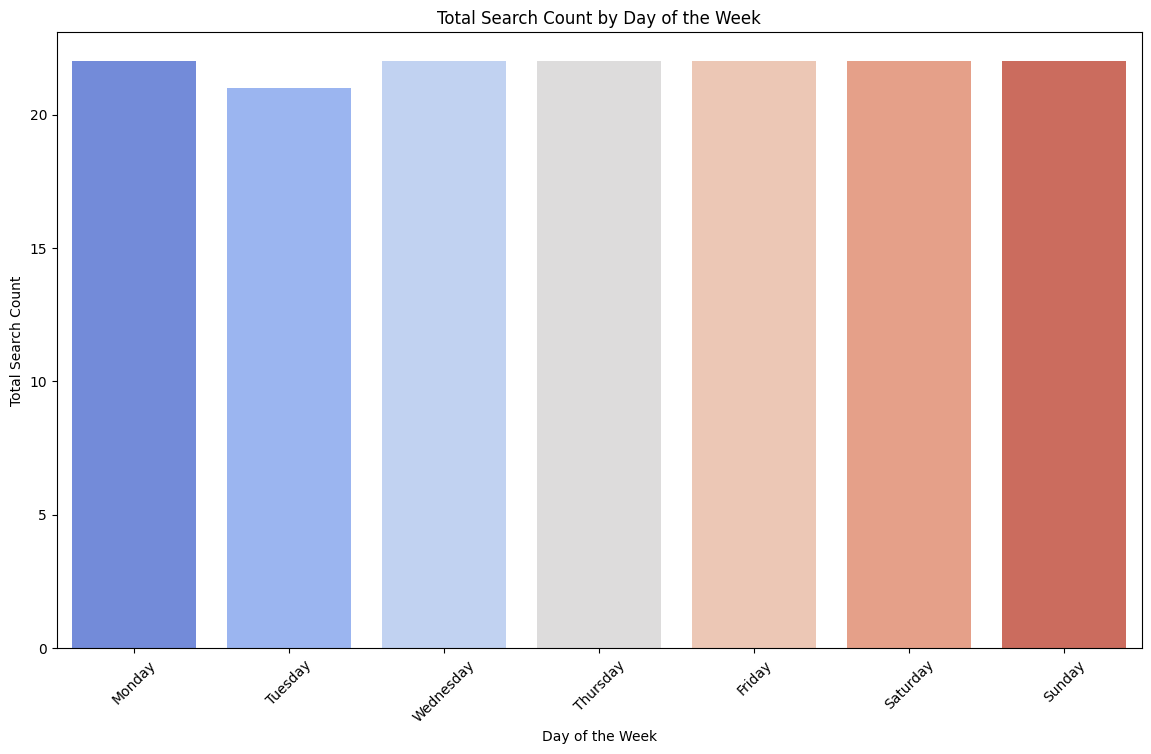

In [17]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week and day name
df['day_name'] = df['date'].dt.day_name()

# Group by day and count occurrences of each search topic
day_search_counts = df.groupby(['day_name', 'search topic']).size().reset_index(name='search_count')

# Pivot the data to have days as rows and search topics as columns
pivot_table = day_search_counts.pivot(index='day_name', columns='search topic', values='search_count').fillna(0)

# Reorder days to appear from Monday to Sunday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Visualization 1: Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='day_name', y='search_count', data=day_search_counts, ci=None, estimator=sum, order=ordered_days, palette='coolwarm')
plt.title('Total Search Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Search Count')
plt.xticks(rotation=45)
plt.show()


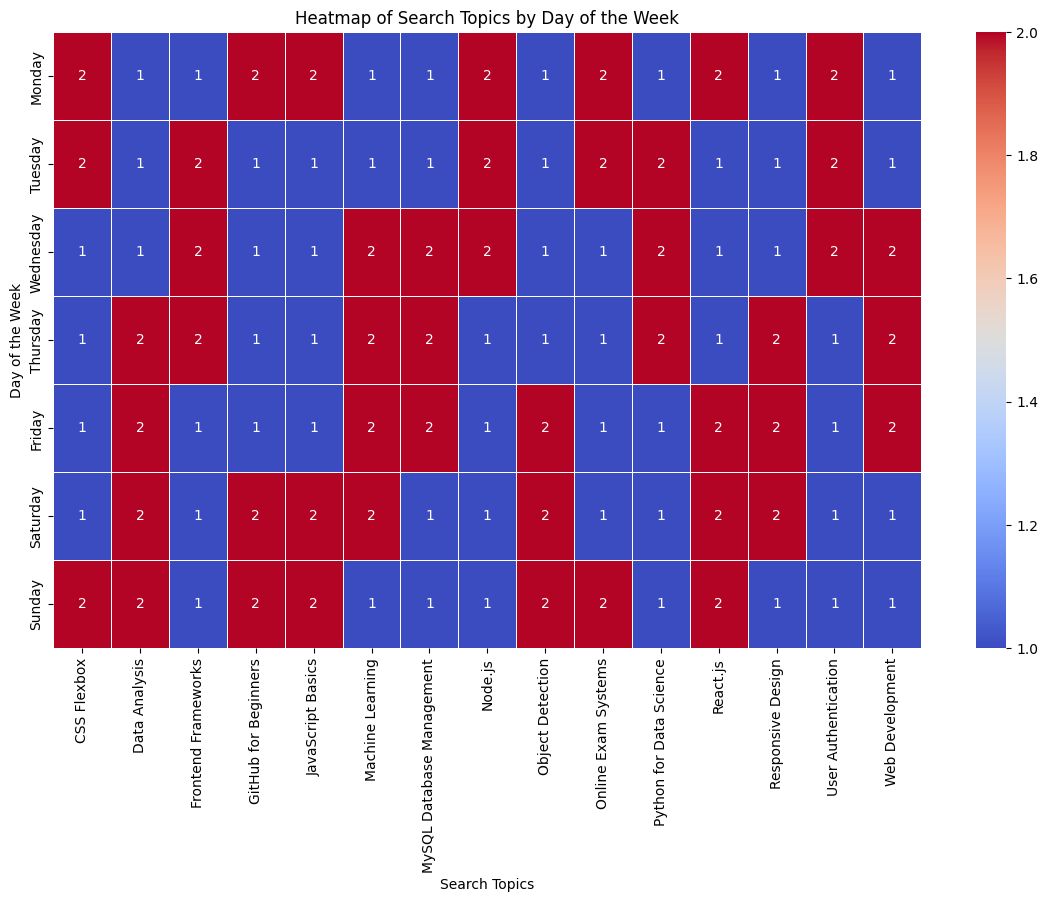

In [18]:
# Visualization 2: Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Heatmap of Search Topics by Day of the Week')
plt.xlabel('Search Topics')
plt.ylabel('Day of the Week')
plt.show()